In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

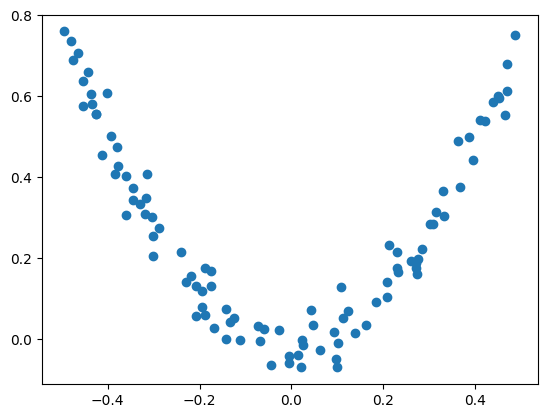

In [3]:
plt.scatter(x, y)

In [4]:
import pandas as pd
df = pd.DataFrame()

In [5]:
df['x'] = x.reshape(100)
df['y'] = y

In [6]:
df.head()

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [7]:
df['p1'] = df['y'].mean()

In [8]:
df['r1'] = df['y'] - df['p1']

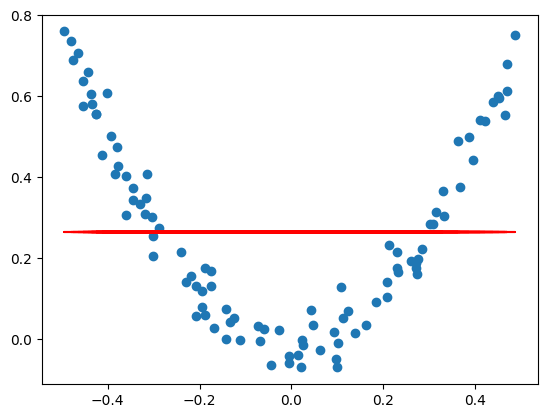

In [9]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['p1'], color= 'red')

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [13]:
tree1.fit(df['x'].values.reshape(100, 1), df['r1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

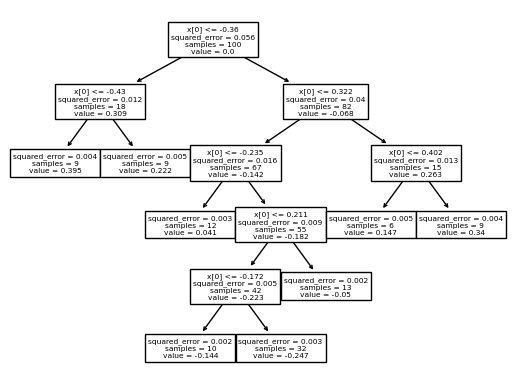

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [15]:
df

,x,y,p1,r1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [16]:
x_test = np.linspace(-0.5, 0.5, 500)

In [17]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500, 1))

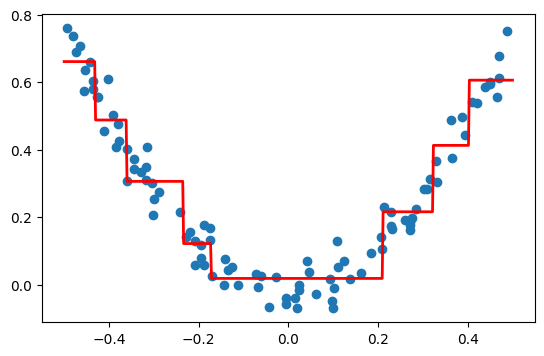

In [19]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])

In [20]:
df['p2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [21]:
df.head()

,x,y,p1,r1,p2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [22]:
df['r2'] = df['y'] - df['p2']

In [23]:
df.head()

,x,y,p1,r1,p2,r2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [24]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
tree2.fit(df['x'].values.reshape(100, 1), df['r2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1, tree2])

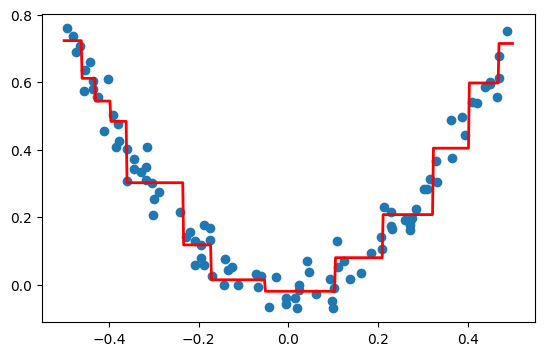

In [27]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])